# Tool for the job: introduction to Julia

![julia-logo](./figures/l1_julia-logo.png)

## Aside 1: Jupyter Notebooks

These slides are a [Jupyter notebook](https://jupyter.org/); a browser-based computational notebook.

> 💡 note: You can follow the lecture along live from the Moodle-based [JupyterHub](https://moodle-app2.let.ethz.ch/course/view.php?id=20175) server.

Code cells are executed by putting the cursor into the cell and hitting `shift + enter`.  For more
info see the [documentation](https://jupyter-notebook.readthedocs.io/en/stable/).

## Aside 2: What is your previous programming experience?

1. Julia
2. Matlab, Python, Octave, R, ...
3. C, Fortran, ...
4. Pascal, Java, C++, ...
5. Lisp, Haskell, ...
6. Assembler
7. Coq, Brainfuck, ...

[Google survey link](https://docs.google.com/forms/d/1ROOY4QLaL-_vM8eXKhCp72FCPfaTshfCrR2syv562BE/edit#responses)

## The Julia programming language

[Julia](https://julialang.org/) is a modern, interactive, and high performance programming language.  It's a general purpose
language with a bend on technical computing.

![julia-logo](./figures/l1_julia-logo-repl.png)

- first released in 2012
- reached version 1.0 in 2018
- current version 1.9.3 (09.2023) [ETH's JupyterHub is on 1.8]
- thriving community, for instance there are currently around 10000 [packages registered](https://juliahub.com/ui/Packages)

### What does Julia look like

An example solving the Lorenz system of ODEs:

In [1]:
# using Plots

function lorenz(x)
    σ = 10
    β = 8/3
    ρ = 28
    [σ*(x[2]-x[1]),
     x[1]*(ρ-x[3]) - x[2],
     x[1]*x[2] - β*x[3]]
end

# integrate dx/dt = lorenz(t,x) numerically for 500 steps
dt = 0.01
x₀ = [2.0, 0.0, 0.0]
out = zeros(3, 500)
out[:,1] = x₀
for i=2:size(out,2)
    out[:,i] = out[:,i-1] + lorenz(out[:,i-1]) * dt
end

Yes, this takes some time... Julia is Just-Ahead-of-Time compiled.  I.e. Julia is compiling.
(Note that Julia 1.9 improved a lot with respect to compilation time.)

And its solution plotted

In [2]:
# plot(out[1,:], out[2,:], out[3,:])

### Julia in brief
Julia 1.0 released 2018, now at version 1.9

Features:
- general purpose language with a focus on technical computing
- dynamic language
  - interactive development
  - garbage collection
- good performance on par with C & Fortran
  - just-ahead-of-time compiled via LLVM
  - No need to vectorise: for loops are fast
- multiple dispatch
- user-defined types are as fast and compact as built-ins
- Lisp-like macros and other metaprogramming facilities
- designed for parallelism and distributed computation
- good inter-op with other languages

### The two language problem

**One language to prototype   --  one language for production**
- example from Ludovic's past: prototype in Matlab, production in CUDA-C

**One language for the users  --  one language for under-the-hood**
- Numpy (python -- C)
- machine-learning: pytorch, tensorflow

![](./figures/l1_ml.png)

### The two language problem

Prototype/interface language:
- easy to learn and use
- interactive
- productive
- --> *but slow*
- Examples: Python, Matlab, R, IDL...

Production/fast language:
- fast
- --> *but* complicated/verbose/not-interactive/etc
- Examples: C, C++, Fortran, Java...

###  Julia solves the two-language problem

Julia is:
- easy to learn and use
- interactive
- productive

and also:
- fast

![](./figures/l1_flux-vs-tensorflow.png)

###  Let's get our hands dirty!

Fire up your JupyterHub, either via the [Moodle page](https://moodle-app2.let.ethz.ch/course/view.php?id=20175), or directly via [this link](https://jhub-let-04-20175.let.ethz.ch/hub/home).

[Brief explanation on JupyterHub]

This notebook you can get onto your JupyterHub by

- opening the hub
- opening a terminal
- pasting into the terminal `wget https://people.ee.ethz.ch/~werderm/l1.ipynb`

Open it by clicking on it in the sidebar.

###  Let's get our hands dirty!

We will now look at
- variables and types
- control flow
- functions
- modules and packages

The documentation of Julia is good and can be found at [https://docs.julialang.org](https://docs.julialang.org); although for learning it might be a bit terse...

There are also tutorials, see [https://julialang.org/learning/](https://julialang.org/learning/).

Furthermore, documentation can be gotten with `?xyz`

In [3]:
# ?cos

## Variables, assignments, and types [5min]
[https://docs.julialang.org/en/v1/manual/variables/](https://docs.julialang.org/en/v1/manual/variables/)

In [4]:
a = 4
b = "a string"
c = b # now b and c bind to the same value

"a string"

Conventions:
- variables are (usually) lowercase, words can be separated by `_`
- function names are lowercase
- modules, packages and types are in CamelCase

### Variables: Unicode
From [https://docs.julialang.org/en/v1/manual/variables/](https://docs.julialang.org/en/v1/manual/variables/):

Unicode names (in UTF-8 encoding) are allowed:

```julia
julia> δ = 0.00001
1.0e-5

julia> 안녕하세요 = "Hello"
"Hello"
```

In the Julia REPL and several other Julia editing environments, you can type many Unicode math
symbols by typing the backslashed LaTeX symbol name followed by tab. For example, the variable
name `δ` can be entered by typing `\delta`-*tab*, or even `α̂⁽²⁾` by `\alpha`-*tab*-`\hat`-
*tab*-`\^(2)`-*tab*. (If you find a symbol somewhere, e.g. in someone else's code,
that you don't know how to type, the REPL help will tell you: just type `?` and
then paste the symbol.)

In [5]:
#

### Basic datatypes
- numbers (Ints, Floats, Complex, etc.)
- strings
- tuples
- arrays
- dictionaries

In [6]:
1     # 64 bit integer (or 32 bit if on a 32-bit OS)
1.5   # Float64
1//2  # Rational

1//2

In [7]:
typeof(1.5)

Float64

In [8]:
"a string", (1, 3.5) # and tuple

("a string", (1, 3.5))

In [9]:
[1, 2, 3,] # array of eltype Int

3-element Vector{Int64}:
 1
 2
 3

In [10]:
Dict("a"=>1, "b"=>cos)

Dict{String, Any} with 2 entries:
  "b" => cos
  "a" => 1

## Array exercises [15min]

We will use arrays extensively in this course.

Datatypes belonging to AbstactArrays:
- `Array` (with aliases `Vector`, `Matrix`)
- `Range`
- GPU arrays, static arrays, etc

Task: assign two vectors to `a`, and `b` and the concatenate them using `;`:

In [11]:
a = [2, 3]
b = [4, 5]
[a ; b]

4-element Vector{Int64}:
 2
 3
 4
 5

Add new elements to the end of Vector `b` (hint look up the documentation for `push!`)

In [12]:
push!(b, 1)
push!(b, 3, 4)

5-element Vector{Int64}:
 4
 5
 1
 3
 4

### Array exercises

Concatenate a Range, say `1:10`, with a Vector, say [4,5]:

In [13]:
[1:10; [4,5]]

12-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
  4
  5

Make a random array of size (3,3).  Look up `?rand`.  Assign it to `a`

In [14]:
a = rand(3,3)

3×3 Matrix{Float64}:
 0.824852  0.036515  0.564146
 0.144864  0.8762    0.931263
 0.692635  0.103627  0.811275

### Array exercise: indexing

Access element `[1,2]` and `[2,1]` of Matrix `a` (hint use []):

In [15]:
a[1,2], a[2,1]

(0.036515035564673504, 0.1448635358603696)

Put those two values into a vector

In [16]:
[ a[1,2], a[2,1] ]

2-element Vector{Float64}:
 0.036515035564673504
 0.1448635358603696

Linear vs Cartesian indexing,
access the first element:

In [17]:
a[1]
a[1,1]

0.824852409212429

Access the last element (look up `?end`) both with linear and Cartesian indices

In [18]:
a[end]
a[end, end]

0.8112751056954159

### Array exercise: indexing by ranges

Access the last row of `a` (hint use `1:end`)

In [19]:
a[end, 1:end]

3-element Vector{Float64}:
 0.6926349244682983
 0.10362682125183609
 0.8112751056954159

Access a 2x2 sub-matrix

In [20]:
a[1:2, 1:2]

2×2 Matrix{Float64}:
 0.824852  0.036515
 0.144864  0.8762

### Array exercises: variable bindings and views

What do you make of

In [21]:
a = [1 4; 3 4] # note, this is another way to define a Matrix
c = a
a[1, 2] = 99
@assert c[1,2] == a[1,2]

Type your answer here (to start editing, double click into this cell.  When done shift+enter):

### Array exercises: variable bindings and views

An assignment _binds_ the same array to both variables

In [22]:
c = a
c[1] = 8
@assert a[1]==8 # as c and a are the same thing
@assert a===c  # note the triple `=`

Views vs copies:

In Julia indexing with ranges will create a new array with copies of
the original's entries. Consider

In [23]:
a = rand(3,4)
b = a[1:3, 1:2]
b[1] = 99
@assert a[1] != b[1]

### Array exercises: variable bindings and views

But the memory footprint will be large if we work with large arrays and take sub-arrays of them.

Views to the rescue

In [24]:
a = rand(3,4)
b = @view a[1:3, 1:2]
b[1] = 99

99

check whether the change in `b` is reflected in `a`:

In [25]:
@assert a[1] == 99

### A small detour: types

All values have types as we saw above.  Arrays store in their type what type the elements can be.

> Arrays which have concrete element-types are more performant!

In [26]:
typeof([1, 2]), typeof([1.0, 2.0])

(Vector{Int64}, Vector{Float64})

Aside, they also store their dimension in the second parameter.

The type can be specified at creation

In [27]:
String["one", "two"]

2-element Vector{String}:
 "one"
 "two"

Create an array taking `Int` with no elements.  Push `1`, `1.0` and `1.5` to it.  What happens?

In [28]:
a = Int[]
push!(a, 1) ## works
push!(a, 1.0) ## works

2-element Vector{Int64}:
 1
 1

push!(a, 1.5) ## would error as 1.5 cannot be converted to an Int

Make an array of type `Any` (which can store any value).  Push a value of type
Int and one of type String to it.

In [29]:
a = []
push!(a, 5)
push!(a, "a")

2-element Vector{Any}:
 5
  "a"

Try to assgin 1.5 to the first element of an array of type Array{Int,1}

[1][1] = 1.5 ## would error

### Array exercises

Create a uninitialised Matrix of size (3,3) and assign it to `a`.
First look up the docs of Array with `?Array`

In [30]:
a = Array{Any}(undef, 3, 3)

3×3 Matrix{Any}:
 #undef  #undef  #undef
 #undef  #undef  #undef
 #undef  #undef  #undef

Test that its size is correct, see `size`

In [31]:
size(a)

(3, 3)

### Array exercises: ALL DONE

The rest about Arrays you will learn-by-doing.

## Control flow [10min]

Julia provides a variety of [control flow constructs](https://docs.julialang.org/en/v1/manual/control-flow/), of which we look at:

  * [Conditional Evaluation](https://docs.julialang.org/en/v1/manual/control-flow/#man-conditional-evaluation): `if`-`elseif`-`else` and `?:` (ternary operator).
  * [Short-Circuit Evaluation](https://docs.julialang.org/en/v1/manual/control-flow/#Short-Circuit-Evaluation): logical operators `&&` (“and”) and `||` (“or”), and also chained comparisons.
  * [Repeated Evaluation: Loops](https://docs.julialang.org/en/v1/manual/control-flow/#man-loops): `while` and `for`.

### Conditional evaluation

Read the first paragraph of
[https://docs.julialang.org/en/v1/manual/control-flow/#man-conditional-evaluation](https://docs.julialang.org/en/v1/manual/control-flow/#man-conditional-evaluation)
(up to "... and no further condition expressions or blocks are evaluated.")

Write a test which looks at the start of the string in variable `a`
(?startswith) and sets `b` accordingly.  If the start is
- "Wh" then set `b = "Likely a question"`
- "The " then set `b = "A noun"`
- otherwise set `b = "no idea"`

In [32]:
a = "Where are the flowers"
if startswith(a, "Wh")
  b = "Likely a question"
elseif startswith(a, "The")
  b = "Likely a noun"
else
  b = "no idea"
end

"Likely a question"

### Conditional evaluation: the "ternary operator" `?`

Look up the docs for `?` (i.e. evaluate `??`)

In [33]:
a = 1
a > 5 ? "really big" : "not so big"

"not so big"

### Short circuit operators `&&` and `||`

Read [https://docs.julialang.org/en/v1/manual/control-flow/#Short-Circuit-Evaluation](https://docs.julialang.org/en/v1/manual/control-flow/#Short-Circuit-Evaluation)

Explain what this does

```
a < 0 && error("Not valid input for `a`")
```

Type your answer here (to start editing, double click into this cell.  When done shift+enter):

If `a < 0` evaluates to `true` then the bit after the `&&` is evaluated too,
i.e. an error is thrown.  Otherwise, only `a < 0` is evaluated and no error is thrown.

### Loops: `for` and `while`

[https://docs.julialang.org/en/v1/manual/control-flow/#man-loops](https://docs.julialang.org/en/v1/manual/control-flow/#man-loops)

In [34]:
for i = 1:3
    println(i)
end

for i in ["dog", "cat"] ## `in` and `=` are equivalent for writing loops
    println(i)
end

i = 1
while i<4
    println(i)
    i += 1
end

1
2
3
dog
cat
1
2
3


## Functions [15min]

Functions can be defined in Julia in a number of ways.  In particular there is one variant
more suited to longer definitions, and one for one-liners:

```
function f(a, b)
   return a * b
end
f(a, b) = a * b
```

Defining many, short functions is typical in good Julia code.

Read [https://docs.julialang.org/en/v1/manual/functions/](https://docs.julialang.org/en/v1/manual/functions/) up to an including "The return Keyword"

### Functions: exercises

Define a function in long-form which takes two arguments.
Use some if-else statements and the return keyword.

In [35]:
function fn(a, b)
  if a> b
    return a
  else
    return b
  end
end

fn (generic function with 1 method)

### Functions: exercises

Re-define the `map` function.  First look up what it does `?map`, then create a `mymap` which
does the same.  Map `sin` over the vector `1:10`.

(Note, this is a higher-order function: a function which take a function as a argument)

In [36]:
mymap(fn, a) = [fn(aa) for aa in a]
mymap(sin, 1:10)

10-element Vector{Float64}:
  0.8414709848078965
  0.9092974268256817
  0.1411200080598672
 -0.7568024953079282
 -0.9589242746631385
 -0.27941549819892586
  0.6569865987187891
  0.9893582466233818
  0.4121184852417566
 -0.5440211108893698

### Functions: dot-syntax

This is really similar to the `map` function, a short-hand to map/broadcast a
function over values.

Exercise: apply the `sin` function to a vector `1:10`:

In [37]:
#sol=sin.(1:10)

Broadcasting will extend row and column vectors into a matrix.
Try `(1:10) .+ (1:10)'`  (Note the `'`, this is the transpose operator)

In [38]:
#sol=(1:10) .+ (1:10)'

### Functions: dot-syntax exercise

Evaluate the function `sin(x) + cos(y)` for
`x = 0:0.1:pi` and `y = -pi:0.1:pi`.  Remember to use `'`.

In [39]:
#sol=x,y = 0:0.1:pi, -pi:0.1:pi
#sol=sin.(x) .+ cos.(y')

### Functions: anonymous functions

So far our function got a name with the definition. They can also be defined without name.

Read [https://docs.julialang.org/en/v1/manual/functions/#man-anonymous-functions](https://docs.julialang.org/en/v1/manual/functions/#man-anonymous-functions)

Map the function `f(x,y) = sin(x) + cos(x)` over `1:10` but define it as an anonymous
function.

In [40]:
map(x -> sin(x) + cos(x), 1:10)

10-element Vector{Float64}:
  1.3817732906760363
  0.4931505902785393
 -0.8488724885405782
 -1.4104461161715403
 -0.6752620891999122
  0.6807547884514401
  1.4108888530620938
  0.8438582128147682
 -0.49901177664292035
 -1.383092639965822

### Key feature: multiple dispatch functions

- Julia is not an object oriented language

OO:
- methods belong to objects
- method is selected based on first argument (e.g. `self` in Python)

Multiple dispatch:
- methods are separate from objects
- are selected based on all arguments
- similar to overloading but method selection occurs at runtime and not compile-time (see also video below)
> very natural for mathematical programming

JuliaCon 2019 presentation on the subject by Stefan Karpinski
(co-creator of Julia):

["The Unreasonable Effectiveness of Multiple Dispatch"](https://www.youtube.com/watch?v=kc9HwsxE1OY)

## Functions: Multiple dispatch demo

In [41]:
struct Rock end
struct Paper end
struct Scissors end
### of course structs could have fields as well
# struct Rock
#     color
#     name::String
#     density::Float64
# end

# define multi-method
play(::Rock, ::Paper) = "Paper wins"
play(::Rock, ::Scissors) = "Rock wins"
play(::Scissors, ::Paper) = "Scissors wins"
play(a, b) = play(b, a) # commutative

play(Scissors(), Rock())

"Rock wins"

### Multiple dispatch demo
Can easily be extended later

with new type:

In [42]:
struct Pond end
play(::Rock, ::Pond) = "Pond wins"
play(::Paper, ::Pond) = "Paper wins"
play(::Scissors, ::Pond) = "Pond wins"

play(Scissors(), Pond())

"Pond wins"

with new function:

In [43]:
combine(::Rock, ::Paper) = "Paperweight"
combine(::Paper, ::Scissors) = "Two pieces of papers"
# ...

combine(Rock(), Paper())

"Paperweight"

*Multiple dispatch makes Julia packages very composable!*

This is a key characteristic of the Julia package ecosystem.

## Modules and packages [5min]

Modules can be used to structure code into larger entities, and be used to divide it into
different name spaces.  We will not make much use of those, but if interested see
[https://docs.julialang.org/en/v1/manual/modules/](https://docs.julialang.org/en/v1/manual/modules/)

**Packages** are the way people distribute code and we'll make use of them extensively.
In the first example, the Lorenz ODE, you saw
```
using Plots
```
This statement loads the package `Plots` and makes its functions
and types available in the current session and use it like so:

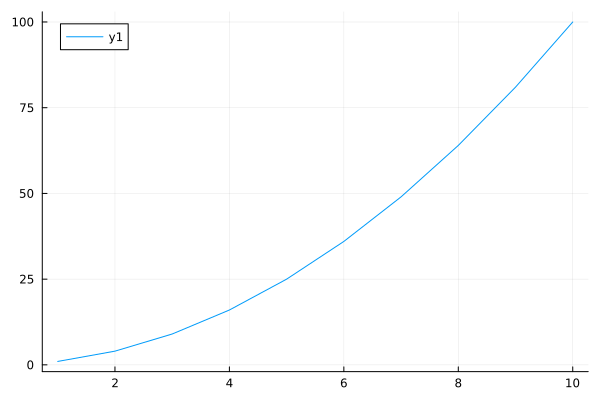

In [44]:
using Plots
plot( (1:10).^2 )

### Packages

**Note** package installation does not work on the moodle-Jupyterhub.  But it will work on your local installation.

All public Julia packages are listed on [https://juliahub.com/ui/Packages](https://juliahub.com/ui/Packages).

You can install a package, say `UnPack.jl` by
```julia-repl
using Pkg
Pkg.add("UnPack.jl")
using UnPack
```

In the REPL, there is also a package-mode (hit `]`) which is for interactive use.

In [45]:
# Install a package (maybe not a too big one, UnPack.jl is good that way),
# use it, query help on the package itself:

## This concludes the rapid Julia tour

There are many more features of Julia for sure but this should get you started, and setup for
the exercises.  (Let us know if you feel we left something out which would have been helpful for the exercises).

Remember you can self-help with:
- using `?` at the notebook.  Similarly there is an `apropos` function.
- the docs are your friend [https://docs.julialang.org/en/v1/](https://docs.julialang.org/en/v1/)
- ask for help in our chat channel: see Moodle